In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)

#Create an input node
sns = sens(mng,(1,5))
at = act(mng)
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,1)
t3 = thr(mng,1)
t4 = thr(mng,1)
t5 = thr(mng,2)
t6 = thr(mng,2)
t7 = thr(mng,2)
t8 = thr(mng,2)

In [3]:
sns.inputs

In [4]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t5,0)
t2.add_consumer(t6,0)
t3.add_consumer(t7,0)
t4.add_consumer(t8,0)
t8.add_consumer(at,0)
sns.add_consumer(t1,0,(0,4))
sns.add_consumer(t2,0,(0,3))
sns.add_consumer(t5,0,(0,3))
sns.add_consumer(t3,0,(0,2))
sns.add_consumer(t6,0,(0,2))
sns.add_consumer(t4,0,(0,1))
sns.add_consumer(t7,0,(0,1))
sns.add_consumer(t8,0,(0,0))

In [5]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_MAA9 --> thr_EO2D with : wire_KLZ5
thr_8LVB --> thr_4U13 with : wire_FSSC
thr_1CSH --> thr_R6RU with : wire_8Z87
thr_SFC9 --> thr_U3Q5 with : wire_T2CZ
thr_U3Q5 --> act_CS02 with : wire_7T1W


In [6]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='right2left_movement', directory='right2left', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] thr_MAA9 [label ="1"] thr_8LVB [label ="1"] thr_1CSH [label ="1"] thr_SFC9 [label ="1"] thr_EO2D [label ="2"] thr_4U13 [label ="2"] thr_R6RU [label ="2"] thr_U3Q5 [label ="2"] thr_MAA9 -> thr_EO2D [arrowhead="rnormal"] thr_8LVB -> thr_4U13 [arrowhead="rnormal"] thr_1CSH -> thr_R6RU [arrowhead="rnormal"] thr_SFC9 -> thr_U3Q5 [arrowhead="rnormal"] thr_U3Q5 -> act_CS02 [arrowhead="rnormal"] input_ET6N [color=black style=filled shape=circle label="" width=0.25] input_ET6N -> thr_U3Q5 [arrowhead="rnormal"] input_BTOE [color=black style=filled shape=circle label="" width=0.25] input_BTOE -> thr_SFC9 [arrowhead="rnormal"] input_BTOE -> thr_R6RU [arrowhead="rnormal"] input_WX2B [color=black style=filled shape=circle label="" width=0.25] input_WX2B -> thr_1CSH [arrowhead="rnormal"] input_WX2B -> thr_4U13 [arrowhead="rnormal"] input_W1XY [color=black style=filled shape=circle label="" width=0.25] input_W1XY -> thr_8LVB [arrowhead="rnormal"

'right2left\\right2left_movement.png'

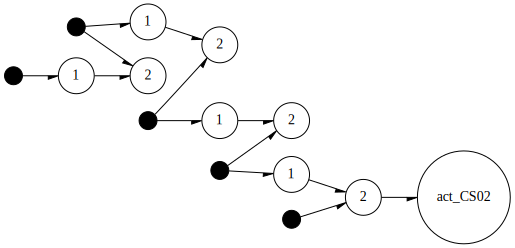

In [7]:
src

In [8]:
movement = [[0,0,0,0,1],
            [0,0,0,1,0],
            [0,0,1,0,0],
            [0,1,0,0,0],
            [1,0,0,0,0]]

In [9]:
for i in range(5):
    sns.feed(movement[i])
    mng.update()

[0, 0, 0, 0, 1]
I : 0
I : 0
I : 0
I : 0
I : 1
signaled
Thresholds at time 0 after the signal: 
[1, 0, 0, 0, 0, 0, 0, 0]
Threshold outputs at time 0
thr_MAA9 --> wire_KLZ5
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 0
thr_MAA9 --> thr_EO2D with : wire_KLZ5
thr_8LVB --- thr_4U13 with : wire_FSSC
thr_1CSH --- thr_R6RU with : wire_8Z87
thr_SFC9 --- thr_U3Q5 with : wire_T2CZ
thr_U3Q5 --- act_CS02 with : wire_7T1W
Thresholds at time 0 after wire update: 
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]
I : 0
I : 0
I : 0
I : 1
signaled
Thresholds at time 1 after the signal: 
[0, 1, 0, 0, 2, 0, 0, 0]
I : 0
Threshold outputs at time 1
thr_8LVB --> wire_FSSC
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0, 0, 0, 0]
Wire outputs at time 1
thr_MAA9 --- thr_EO2D with : wire_KLZ5
thr_8LVB --> thr_4U13 with : wire_FSSC
thr_1CSH --- thr_R6RU with : wire_8Z87
thr_SFC9 --- thr_U3Q5 with : wire_T2CZ
thr_U3Q5 --- act_CS02 with : wire_7T1W
Thresholds at 